# Prediction using Supervised ML
Predicting the percentage of a student based on the number of study hours using Simple Linear Regression. It is a simple linear regression as it involves just two variables. 

#  Exploratory Data Analysis Steps

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data is imported successfully")
print(df)

Data is imported successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
#df.shape gives the number of rows and columns present

print('The shape of our dataframe is:', df.shape)

The shape of our dataframe is: (25, 2)


In [4]:
#info() function of the pandas library gives the general information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#head() function is used to print the first 5 rows of the dataset

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
#tail() function is used to print the last 5 rows of the dataset

df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [41]:
#describe function is used to get the summary of the statistics of the dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Identifying Outliers

In [6]:
# Checking for outliers by finding the difference between median and mean.

print("Hours: mean =",df['Hours'].mean(),",median =",df['Hours'].median())
print("Scores: mean =",df['Scores'].mean(),",median =",df['Scores'].median())

#The difference is very small hence there are no outliers

Hours: mean = 5.012 ,median = 4.8
Scores: mean = 51.48 ,median = 47.0


In [9]:
#checking if there are any missing values in the dataset

df.isna().sum()

#there are no missing values in the dataset

Hours     0
Scores    0
dtype: int64

# Data Visualization

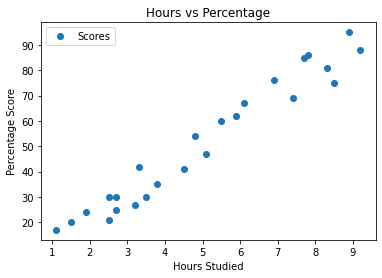

In [12]:
#Creating a 2D plot for the distribution of scores

df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#There is a linear relationship between the number of hours studied and percentage scored

# Data Preprocessing

In [15]:
#extracting x and y from the dataset
#x = attributes/inputs ; y = labels/outputs

x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [16]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [18]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [19]:
#splitting the dataset into training and test set using train_test_split() function of scikit-learn library

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [42]:
#here features means x and labels means y

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (20, 1)
Training Labels Shape: (20,)
Testing Features Shape: (5, 1)
Testing Labels Shape: (5,)


# Creating and training the linear regression model

In [21]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 

LinearRegression()

In [24]:
print(x_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [25]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


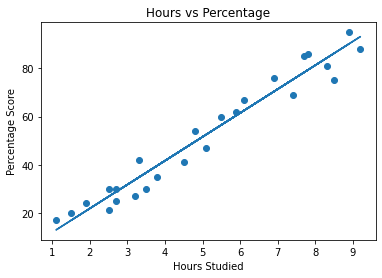

In [44]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [27]:
#predicting the scores

y_pred = lr.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [28]:
# Comparing Actual vs Predicted

d = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
d 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [43]:
#testing the model with a sample data

own_pred = lr.predict(np.array([9.25]).reshape(1, 1))
print("Predicted Score if a person studies for 9.25 hours = {}".format(own_pred[0]))

Predicted Score if a person studies for 9.25 hours = 93.69173248737535


In [38]:
#Evaluating the model by finding the accuracy and errors

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('r2_score = ',r2)
print('mean absolute error = ',mae)
print('mean squared error = ',mse)
print('root mean squared error = ',rmse)

#here r2_score is the accuracy

r2_score =  0.9454906892105355
mean absolute error =  4.183859899002975
mean squared error =  21.598769307217406
root mean squared error =  4.647447612100367


### The accuracy of the model is 94% 

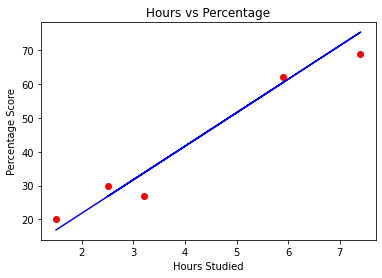

In [45]:
#Final plot between the test values and the predicted output

plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()